/tmp/ipython-input-2591651700.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  targets_binary = targets_numeric.replace(



--- 2. PREDIZIONE 'POLI-CONSUMATORE' ---
Distribuzione Poli-Consumatori (3+ droghe illegali): 
Poly_User
1    1840
0      45
Name: count, dtype: int64
Report Classificazione Poli-Consumatori:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.98      1.00      0.99       461

    accuracy                           0.98       472
   macro avg       0.49      0.50      0.49       472
weighted avg       0.95      0.98      0.97       472



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/tmp/ipython-input-2591651700.py:47: FutureWarnin

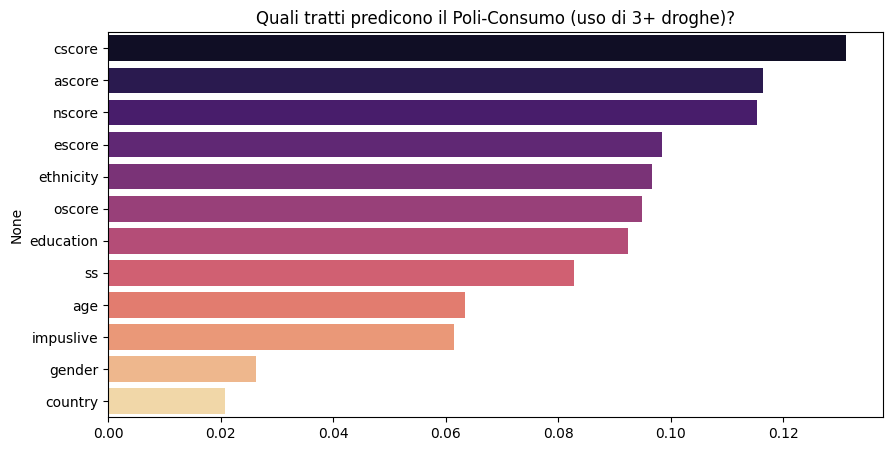

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# --- PREPARAZIONE DATI COMUNE ---
# Convertiamo tutti i target in numerico binario (0=Non User, 1=User) per facilitare le analisi
targets_numeric = drug_consumption.data.targets.copy()
targets_binary = targets_numeric.replace(
    {'CL0': 0, 'CL1': 0, 'CL2': 1, 'CL3': 1, 'CL4': 1, 'CL5': 1, 'CL6': 1}
)
# Creiamo liste di droghe legali vs illegali per i confronti
legal_drugs = ['Alcohol', 'Caff', 'Choc', 'Nicotine']
illegal_drugs = [col for col in targets_binary.columns if col not in legal_drugs and col != 'Semer']


# ==============================================================================
# 2. PREDIZIONE USO SIMULTANEO (POLI-CONSUMO)
# Obiettivo: Prevedere chi usa Cannabis E Alcol insieme (o un mix di illegali)
# ==============================================================================
print("\n--- 2. PREDIZIONE 'POLI-CONSUMATORE' ---")
# Definiamo un "Poli-User" come qualcuno che usa 3 o più droghe illegali
targets_binary['Illegal_Sum'] = targets_binary[illegal_drugs].sum(axis=1)
targets_binary['Poly_User'] = (targets_binary['Illegal_Sum'] >= 3).astype(int)

y_poly = targets_binary['Poly_User']
print(f"Distribuzione Poli-Consumatori (3+ droghe illegali): \n{y_poly.value_counts()}")

# Addestriamo il modello su questo nuovo target
X_train, X_test, y_train, y_test = train_test_split(X, y_poly, test_size=0.25, stratify=y_poly, random_state=42)
rf_poly = RandomForestClassifier(n_estimators=100, random_state=42)
rf_poly.fit(X_train, y_train)
y_pred_poly = rf_poly.predict(X_test)

print("Report Classificazione Poli-Consumatori:")
print(classification_report(y_test, y_pred_poly))

# Feature Importance per Poli-consumo
importances_poly = pd.Series(rf_poly.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(x=importances_poly.values, y=importances_poly.index, palette='magma')
plt.title("Quali tratti predicono il Poli-Consumo (uso di 3+ droghe)?")
plt.show()
